In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In /home/felsal/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/felsal/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/felsal/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/felsal/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/felsal/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

In [2]:
def combine(df_g):
    frames = []
    for name in ["pre_trained_only", "fine_tuned"]:
        fr = df_g[name]
        fr.name ="accuracy"
        fr = fr.reset_index()
        fr.loc[:,"type"] = name
        frames.append(fr)
    return pd.concat(frames).reset_index(drop=True)

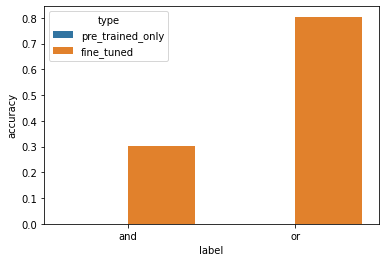

In [3]:
df1 = pd.read_csv("results/BC_basic.csv")
df1 = df1[["label",
        "bert_base_uncased_pre_trained",
        "bert_base_uncased_fine_tuned"]]

df1 = df1.rename(columns={"bert_base_uncased_pre_trained":"pre_trained_only",
                          "bert_base_uncased_fine_tuned":"fine_tuned"})

df1.loc[:, "fine_tuned"] = df1.fine_tuned.where(df1.fine_tuned ==1, 0)
df1.loc[:, "pre_trained_only"] = df1.pre_trained_only.where(df1.pre_trained_only ==1, 0)
df1_g = combine(df1.groupby("label").mean())

sns.barplot(x="label", y="accuracy", hue="type", data=df1_g);

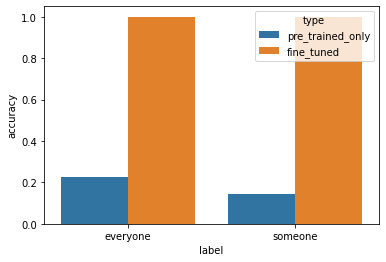

In [4]:
df2 = pd.read_csv("results/Q_basic.csv")
df2 = df2[["label",
        "bert_base_uncased_pre_trained",
        "bert_base_uncased_fine_tuned"]]

df2 = df2.rename(columns={"bert_base_uncased_pre_trained":"pre_trained_only",
                          "bert_base_uncased_fine_tuned":"fine_tuned"})

df2.loc[:, "fine_tuned"] = df2.fine_tuned.where(df2.fine_tuned ==1, 0)
df2.loc[:, "pre_trained_only"] = df2.pre_trained_only.where(df2.pre_trained_only ==1, 0)
df2_g = combine(df2.groupby("label").mean())
sns.barplot(x="label", y="accuracy", hue="type", data=df2_g);

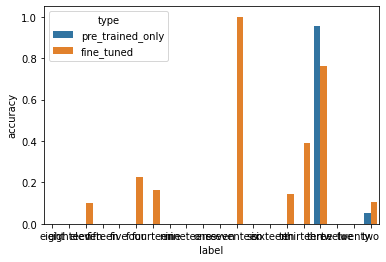

In [5]:
df3 = pd.read_csv("results/count_basic.csv")
df3 = df3[["label",
        "bert_base_uncased_pre_trained",
        "bert_base_uncased_fine_tuned"]]

df3 = df3.rename(columns={"bert_base_uncased_pre_trained":"pre_trained_only",
                          "bert_base_uncased_fine_tuned":"fine_tuned"})

df3.loc[:, "fine_tuned"] = df3.fine_tuned.where(df3.fine_tuned ==1, 0)
df3.loc[:, "pre_trained_only"] = df3.pre_trained_only.where(df3.pre_trained_only ==1, 0)
df3_g = combine(df3.groupby("label").mean())
sns.barplot(x="label", y="accuracy", hue="type", data=df3_g);